In [1]:

#import library penting
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

%matplotlib inline

In [2]:
#load dataset
data = pd.read_csv('Bank Customer.csv')
data

customer_id  credit_score  age  tenure    balance  products_number  \
0        15634602           619   42       2       0.00                1   
1        15647311           608   41       1   83807.86                1   
2        15619304           502   42       8  159660.80                3   
3        15701354           699   39       1       0.00                2   
4        15737888           850   43       2  125510.82                1   
...           ...           ...  ...     ...        ...              ...   
9995     15606229           771   39       5       0.00                2   
9996     15569892           516   35      10   57369.61                1   
9997     15584532           709   36       7       0.00                1   
9998     15682355           772   42       3   75075.31                2   
9999     15628319           792   28       4  130142.79                1   

      credit_card  active_member  estimated_salary  churn  
0               1              1         101348.88      1  
1               0              1         112542.58      0  
2               1              0         113931.57      1  
3               0              0          93826.63      0  
4               1              1          79084.10      0  
...           ...            ...               ...    ...  
9995            1              0          96270.64      0  
9996            1              1         101699.77      0  
9997            0              1          42085.58      1  
9998            1              0          92888.52      1  
9999            1              0          38190.78      0  

[10000 rows x 10 columns]

In [3]:
#cek jumlah data dan kolomnya
data.shape

(10000, 10)

## Step EDA

In [4]:
#cek data kosong
data.isnull().values.any()

False

In [5]:
# Korelasi menggunakan heatmap
import seaborn as sns 
import matplotlib.pyplot as plt


In [6]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

In [7]:
# Calculate correlation matrix
korelasi = numeric_data.corr()
features = korelasi.index

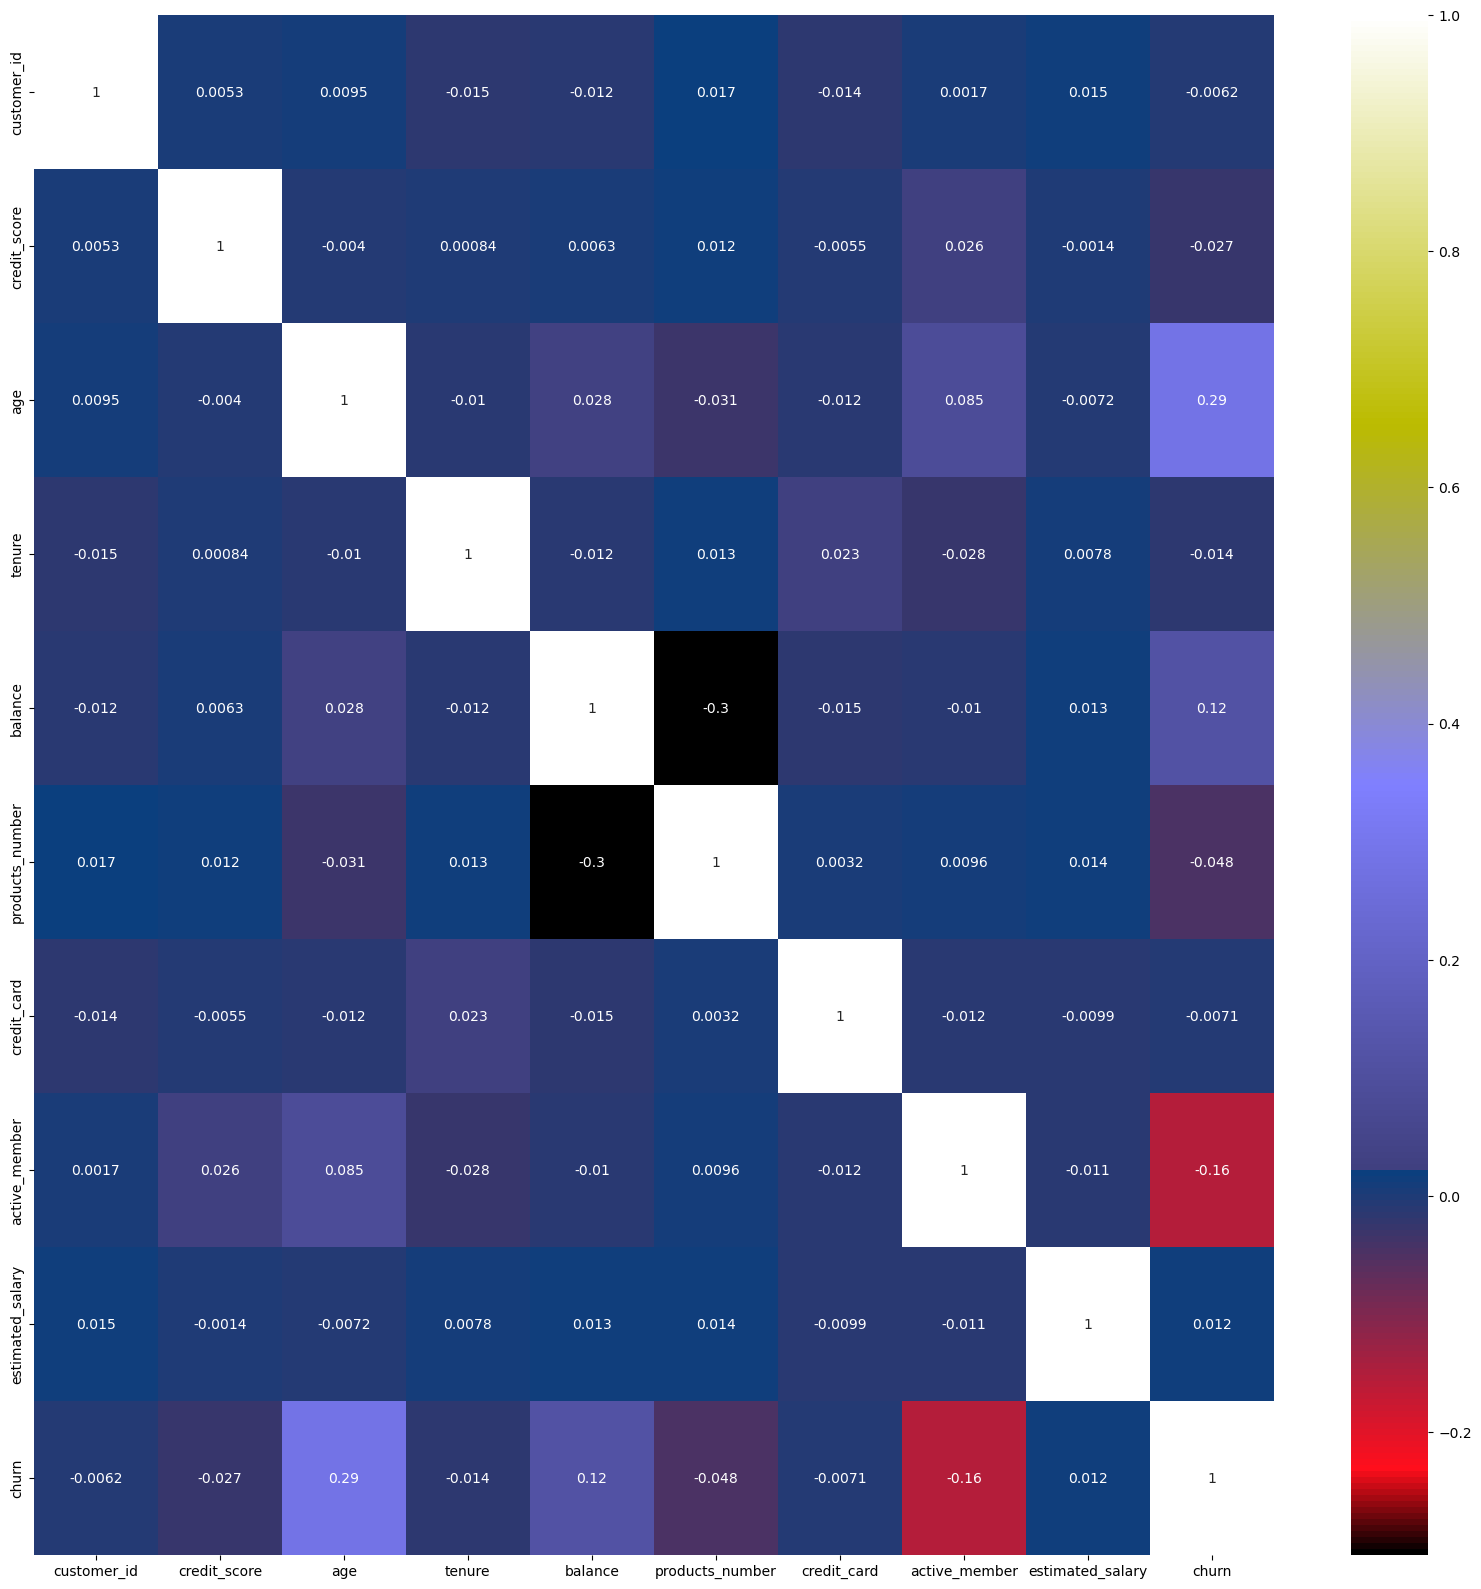

In [8]:
# Plot heatmap
plt.figure(figsize=(20, 20))
g = sns.heatmap(korelasi, annot=True, cmap="gist_stern")
plt.show()

In [9]:
#Show corellation in tables
numeric_data.corr()

customer_id  credit_score       age    tenure   balance  \
customer_id          1.000000      0.005308  0.009497 -0.014883 -0.012419   
credit_score         0.005308      1.000000 -0.003965  0.000842  0.006268   
age                  0.009497     -0.003965  1.000000 -0.009997  0.028308   
tenure              -0.014883      0.000842 -0.009997  1.000000 -0.012254   
balance             -0.012419      0.006268  0.028308 -0.012254  1.000000   
products_number      0.016972      0.012238 -0.030680  0.013444 -0.304180   
credit_card         -0.014025     -0.005458 -0.011721  0.022583 -0.014858   
active_member        0.001665      0.025651  0.085472 -0.028362 -0.010084   
estimated_salary     0.015271     -0.001384 -0.007201  0.007784  0.012797   
churn               -0.006248     -0.027094  0.285323 -0.014001  0.118533   

                  products_number  credit_card  active_member  \
customer_id              0.016972    -0.014025       0.001665   
credit_score             0.012238    -0.005458       0.025651   
age                     -0.030680    -0.011721       0.085472   
tenure                   0.013444     0.022583      -0.028362   
balance                 -0.304180    -0.014858      -0.010084   
products_number          1.000000     0.003183       0.009612   
credit_card              0.003183     1.000000      -0.011866   
active_member            0.009612    -0.011866       1.000000   
estimated_salary         0.014204    -0.009933      -0.011421   
churn                   -0.047820    -0.007138      -0.156128   

                  estimated_salary     churn  
customer_id               0.015271 -0.006248  
credit_score             -0.001384 -0.027094  
age                      -0.007201  0.285323  
tenure                    0.007784 -0.014001  
balance                   0.012797  0.118533  
products_number           0.014204 -0.047820  
credit_card              -0.009933 -0.007138  
active_member            -0.011421 -0.156128  
estimated_salary          1.000000  0.012097  
churn                     0.012097  1.000000

In [10]:
#statistika dasar
data.describe()

customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.492818   
min           1.000000      0.00000       0.000000         11.580000   
25%           1.000000      0.00000       0.000000      51002.110000   
50%           1.000000      1.00000       1.000000     100193.915000   
75%           2.000000      1.00000       1.000000     149388.247500   
max           4.000000      1.00000       1.000000     199992.480000   

              churn  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [11]:
#checking skewness dari data
bank_true_count =len(data.loc[data['churn']==1])
bank_false_count = len(data.loc[data['churn']==0])

In [12]:
#view
(bank_true_count,bank_false_count)

(2037, 7963)

In [13]:
#Missing value
print('total number of rows : {0}'.format(data.shape[0]))
print('total number of columns : {0}'.format(data.shape[1]))

total number of rows : 10000
total number of columns : 10


In [14]:
data.columns

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [15]:
print('Banyak baris nilai nol untuk customer_id :{0}'.format(len(data.loc[data['customer_id']==0])))
print('Banyak baris nilai nol untuk credit_card :{0}'.format(len(data.loc[data['credit_card']==0])))
print('Banyak baris nilai nol untuk active_member :{0}'.format(len(data.loc[data['active_member']==0])))
print('Banyak baris nilai nol untuk churn :{0}'.format(len(data.loc[data['churn']==0])))
print('Banyak baris nilai nol untuk credit_score :{0}'.format(len(data.loc[data['credit_score']==0])))
print('Banyak baris nilai nol untuk age :{0}'.format(len(data.loc[data['age']==0])))
print('Banyak baris nilai nol untuk tenure :{0}'.format(len(data.loc[data['tenure']==0])))
print('Banyak baris nilai nol untuk products_number :{0}'.format(len(data.loc[data['products_number']==0])))
print('Banyak baris nilai nol untuk kestimated_salary :{0}'.format(len(data.loc[data['estimated_salary']==0])))

Banyak baris nilai nol untuk customer_id :0
Banyak baris nilai nol untuk credit_card :2945
Banyak baris nilai nol untuk active_member :4849
Banyak baris nilai nol untuk churn :7963
Banyak baris nilai nol untuk credit_score :0
Banyak baris nilai nol untuk age :0
Banyak baris nilai nol untuk tenure :413
Banyak baris nilai nol untuk products_number :0
Banyak baris nilai nol untuk kestimated_salary :0


In [16]:
data2 = data.copy()

In [17]:
#rata-rata
avg_customer_id = data2['customer_id'].mean()
avg_credit_score = data2['credit_score'].mean()
avg_age = data2['age'].mean()
avg_tenure = data2['tenure'].mean()
avg_products_number = data2['products_number'].mean()
avg_estimated_salary = data2['estimated_salary'].mean()
credit_card_counts = data2['credit_card'].value_counts()
active_member_counts = data2['active_member'].value_counts()
churn_counts = data2['churn'].value_counts()

In [18]:
# Replace zero values in columns with their respective averages or most frequent values
data2['customer_id'].replace({0: avg_customer_id}, inplace=True)
data2['credit_card'].replace({0: data2['credit_card'].value_counts().idxmax()}, inplace=True)
data2['active_member'].replace({0: data2['active_member'].value_counts().idxmax()}, inplace=True)
data2['churn'].replace({0: data2['churn'].value_counts().idxmax()}, inplace=True)
data2['credit_score'].replace({0: avg_credit_score}, inplace=True)
data2['age'].replace({0: avg_age}, inplace=True)
data2['tenure'].replace({0: avg_tenure}, inplace=True)
data2['products_number'].replace({0: avg_products_number}, inplace=True)
data2['estimated_salary'].replace({0: avg_estimated_salary}, inplace=True)

In [19]:
#double check
print('Banyak baris nilai nol untuk customer_id :{0}'.format(len(data2.loc[data2['customer_id']==0])))
print('Banyak baris nilai nol untuk credit_card :{0}'.format(len(data2.loc[data2['credit_card']==0])))
print('Banyak baris nilai nol untuk active_member :{0}'.format(len(data2.loc[data2['active_member']==0])))
print('Banyak baris nilai nol untuk churn :{0}'.format(len(data2.loc[data2['churn']==0])))
print('Banyak baris nilai nol untuk credit_score :{0}'.format(len(data2.loc[data2['credit_score']==0])))
print('Banyak baris nilai nol untuk age :{0}'.format(len(data2.loc[data2['age']==0])))
print('Banyak baris nilai nol untuk tenure :{0}'.format(len(data2.loc[data2['tenure']==0])))
print('Banyak baris nilai nol untuk products_number :{0}'.format(len(data2.loc[data2['products_number']==0])))
print('Banyak baris nilai nol untuk kestimated_salary :{0}'.format(len(data2.loc[data2['estimated_salary']==0])))

Banyak baris nilai nol untuk customer_id :0
Banyak baris nilai nol untuk credit_card :0
Banyak baris nilai nol untuk active_member :0
Banyak baris nilai nol untuk churn :7963
Banyak baris nilai nol untuk credit_score :0
Banyak baris nilai nol untuk age :0
Banyak baris nilai nol untuk tenure :0
Banyak baris nilai nol untuk products_number :0
Banyak baris nilai nol untuk kestimated_salary :0


c:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_11968\378010729.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


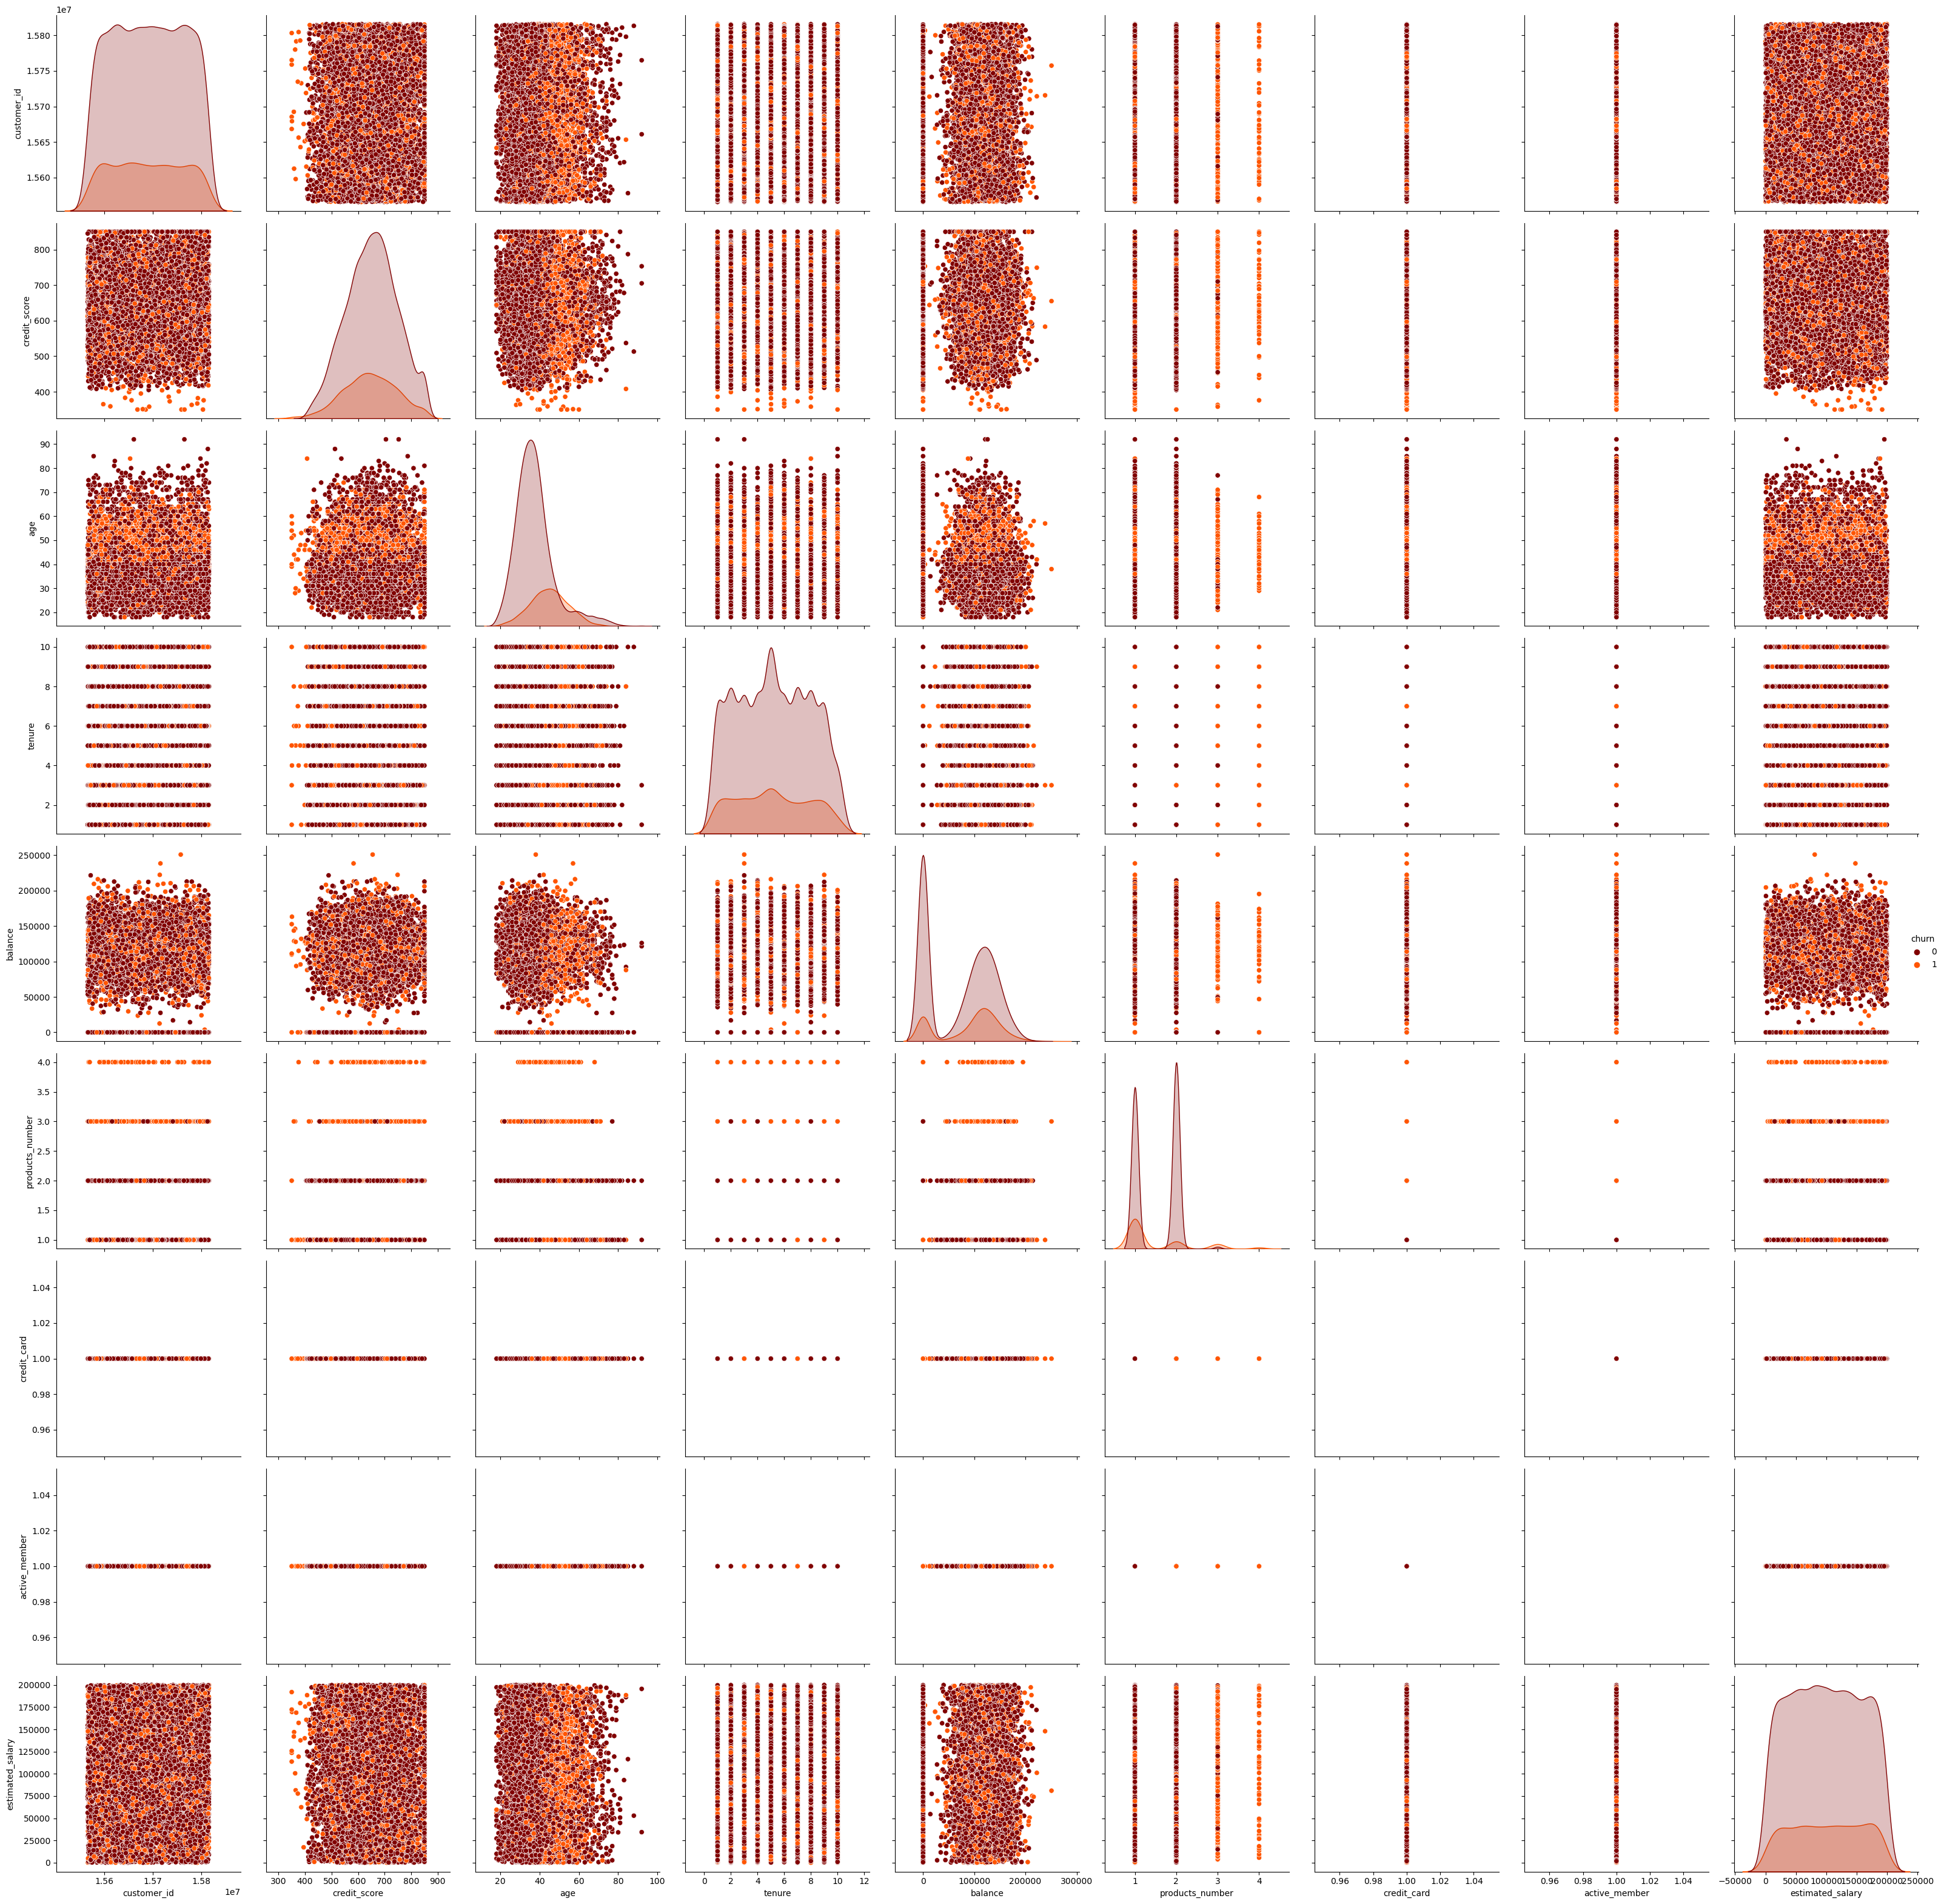

In [20]:
#make pairplot
sns.pairplot(data2,hue='churn',palette='gist_heat',height=3.5)
plt.tight_layout()

C:\Users\USER\AppData\Local\Temp\ipykernel_11968\1827038136.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


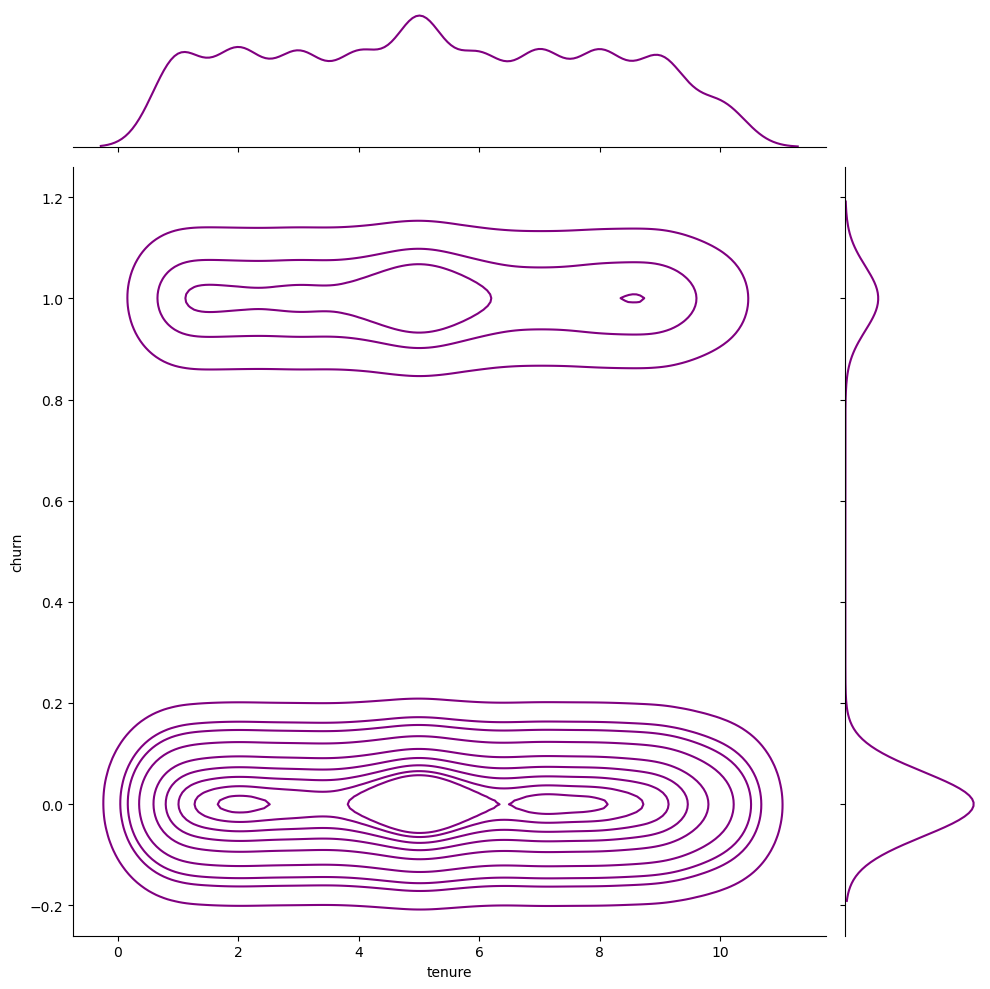

In [21]:
#joinplot
sns.jointplot(x='tenure',y='churn',data=data2,height=10,kind='kde',color='purple')
plt.tight_layout()

## Apply Model

In [22]:
from sklearn.model_selection import train_test_split

X = data2.drop('churn',axis=1)
y = data2['churn']

In [23]:
X

customer_id  credit_score  age  tenure    balance  products_number  \
0        15634602           619   42     2.0       0.00                1   
1        15647311           608   41     1.0   83807.86                1   
2        15619304           502   42     8.0  159660.80                3   
3        15701354           699   39     1.0       0.00                2   
4        15737888           850   43     2.0  125510.82                1   
...           ...           ...  ...     ...        ...              ...   
9995     15606229           771   39     5.0       0.00                2   
9996     15569892           516   35    10.0   57369.61                1   
9997     15584532           709   36     7.0       0.00                1   
9998     15682355           772   42     3.0   75075.31                2   
9999     15628319           792   28     4.0  130142.79                1   

      credit_card  active_member  estimated_salary  
0               1              1         101348.88  
1               1              1         112542.58  
2               1              1         113931.57  
3               1              1          93826.63  
4               1              1          79084.10  
...           ...            ...               ...  
9995            1              1          96270.64  
9996            1              1         101699.77  
9997            1              1          42085.58  
9998            1              1          92888.52  
9999            1              1          38190.78  

[10000 rows x 9 columns]

In [24]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [26]:
X_train

customer_id  credit_score  age  tenure    balance  products_number  \
9254     15601116           686   32     6.0       0.00                2   
1561     15766374           632   42     4.0  119624.60                2   
1670     15716994           559   24     3.0  114739.92                1   
6087     15730759           561   27     9.0  135637.00                1   
6669     15797900           517   56     9.0  142147.32                1   
...           ...           ...  ...     ...        ...              ...   
5734     15596647           768   54     8.0   69712.74                1   
5191     15681075           682   58     1.0       0.00                1   
5390     15573851           735   38     1.0       0.00                3   
860      15807663           667   43     8.0  190227.46                1   
7270     15706268           697   51     1.0  147910.30                1   

      credit_card  active_member  estimated_salary  
9254            1              1         179093.26  
1561            1              1         195978.86  
1670            1              1          85891.02  
6087            1              1         153080.40  
6669            1              1          39488.04  
...           ...            ...               ...  
5734            1              1          69381.05  
5191            1              1            706.50  
5390            1              1          92220.12  
860             1              1          97508.04  
7270            1              1          53581.14  

[8000 rows x 9 columns]

In [27]:
X_train.shape


(8000, 9)

In [28]:
y_train.shape


(8000,)

In [29]:
X_test

customer_id  credit_score  age  tenure    balance  products_number  \
6252     15687492           596   32     3.0   96709.07                2   
4684     15736963           623   43     1.0       0.00                2   
1731     15721730           601   44     4.0       0.00                2   
4742     15762134           506   59     8.0  119152.10                2   
4521     15648898           560   27     7.0  124995.98                1   
...           ...           ...  ...     ...        ...              ...   
6412     15598982           602   53     5.0   98268.84                1   
8285     15572631           609   25    10.0       0.00                1   
7853     15746674           730   47     7.0       0.00                1   
1095     15689081           692   29     4.0       0.00                1   
6929     15651627           628   39     1.0  115341.19                1   

      credit_card  active_member  estimated_salary  
6252            1              1          41788.37  
4684            1              1         146379.30  
1731            1              1          58561.31  
4742            1              1         170679.74  
4521            1              1         114669.79  
...           ...            ...               ...  
6412            1              1          45038.29  
8285            1              1         109895.16  
7853            1              1          33373.26  
1095            1              1          76755.99  
6929            1              1         107674.30  

[2000 rows x 9 columns]

In [30]:
y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: churn, Length: 8000, dtype: int64

## Training

In [31]:

from sklearn.naive_bayes import MultinomialNB

# Membuat objek model Naive Bayes
nb_model = MultinomialNB()

In [32]:
nb_model.fit(X_train,y_train)

MultinomialNB()

In [33]:
nb_prediction = nb_model.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,nb_prediction))

[[707 900]
 [118 275]]


In [35]:
print(classification_report(y_test,nb_prediction))

              precision    recall  f1-score   support

           0       0.86      0.44      0.58      1607
           1       0.23      0.70      0.35       393

    accuracy                           0.49      2000
   macro avg       0.55      0.57      0.47      2000
weighted avg       0.73      0.49      0.54      2000



## Save Model

In [36]:
import pickle

pickle.dump(nb_model,open('NB.pkl','wb'))